In [1]:
from glob import glob
import numpy as np
import pyabf
import matplotlib.pyplot as plt
import matplotlib as mp
from open_abf import plot_swps, get_sweeps, swp_window, get_protocol, files_from_protocol
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.optimize import leastsq
%matplotlib widget

In [2]:
pathToData = "/home/alan/Documents/LAB/CSHL/Data/niko/"
files = glob(pathToData+"*.abf")

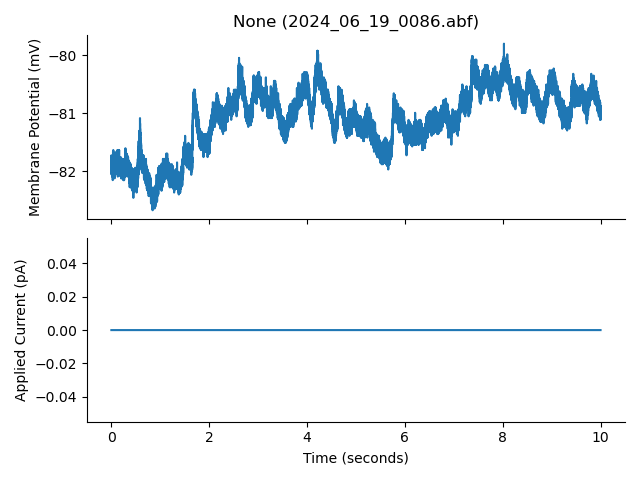

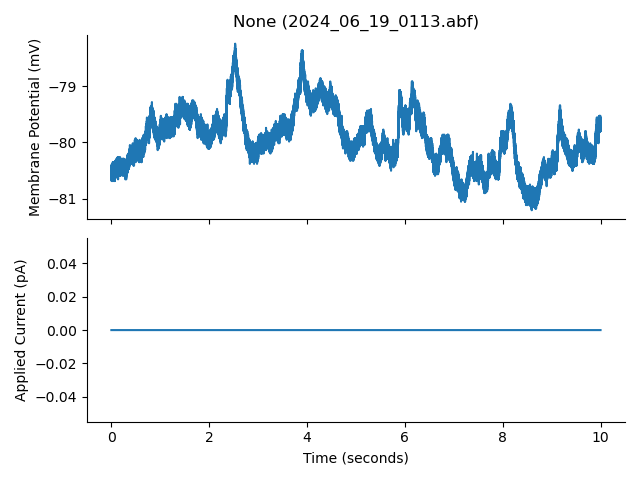

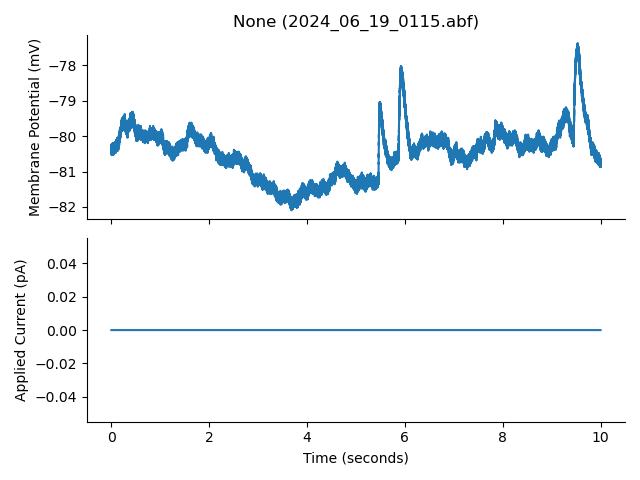

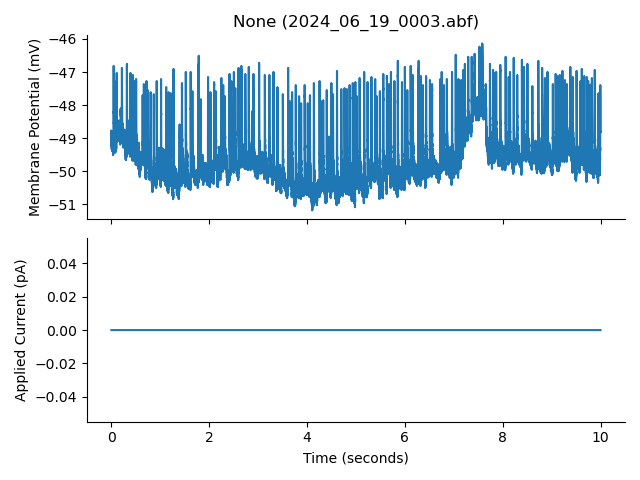

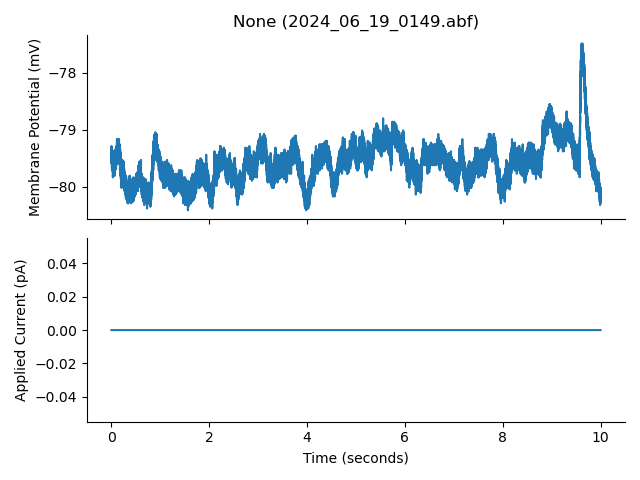

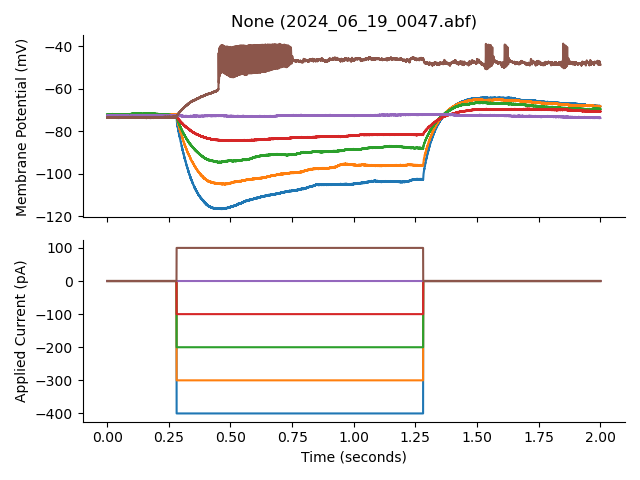

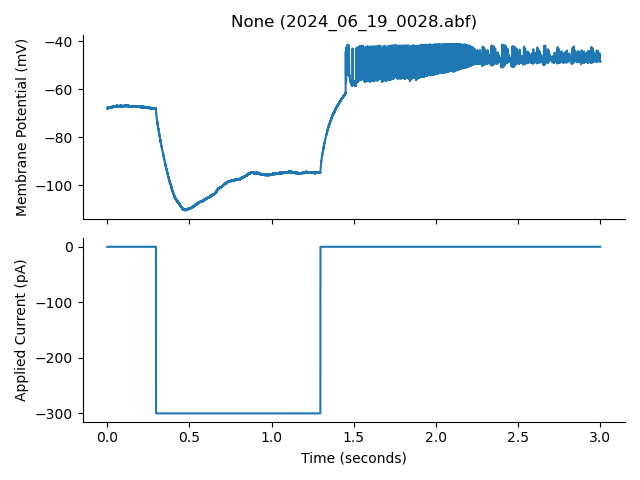

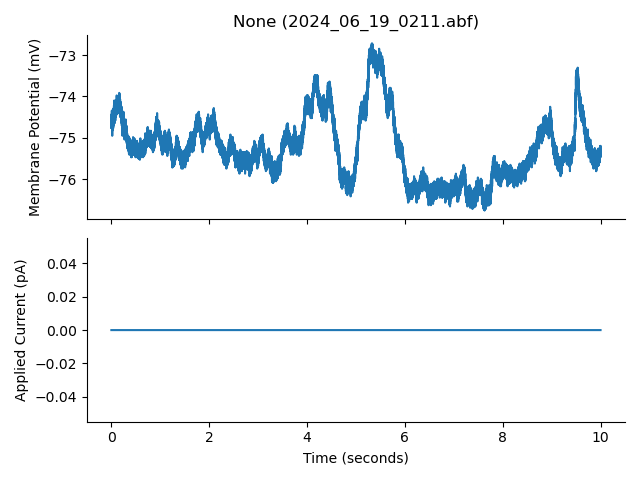

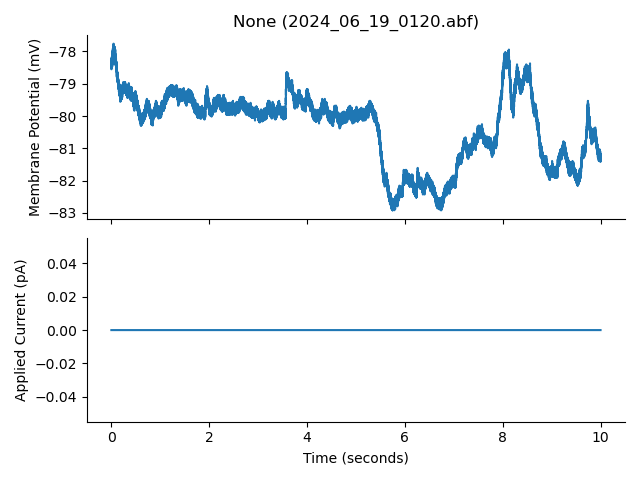

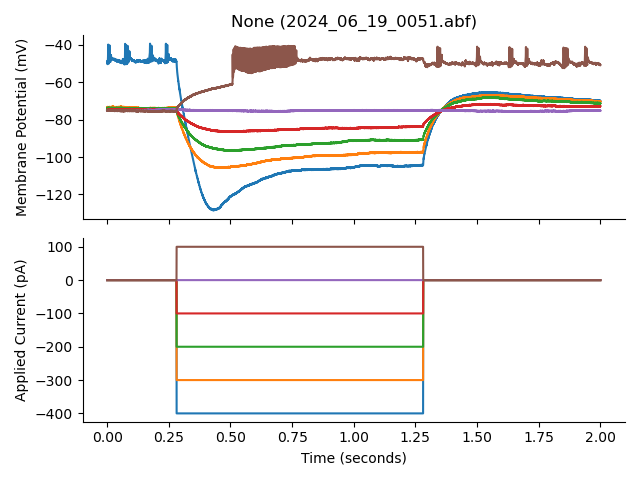

In [3]:
plt.close('all')
## Explore files
for f in files[:10]:
    plot_swps(f)

In [4]:
def is_IV(f,v_step):
    swps, swp_time, sr = get_sweeps(f)
    v_start = 0.5
    v_end = 1
    voltage_step = np.mean(swp_window(swps,v_start,v_end,sr,channel=1),axis=1)
    if voltage_step[0] == v_step[0]:
        return f
    else:
        return ''
        
def is_hyperpol(f):
    swps, swp_time, sr = get_sweeps(f)
    v_start = 0.5
    v_end = 1
    voltage_step = np.mean(swp_window(swps,v_start,v_end,sr,channel=1),axis=1)
    if voltage_step[0] == v_step[0]:
        return f
    else:
        return ''

In [6]:
f = files[9]
swps, swp_time, sr = get_sweeps(f)
round(swp_time[-1])
v_start = 0.5
v_end = 1
voltage_step = np.mean(swp_window(swps,v_start,v_end,sr,channel=1),axis=1)

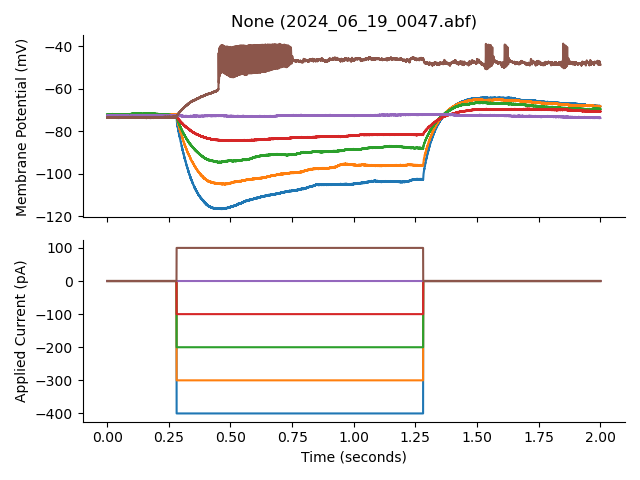

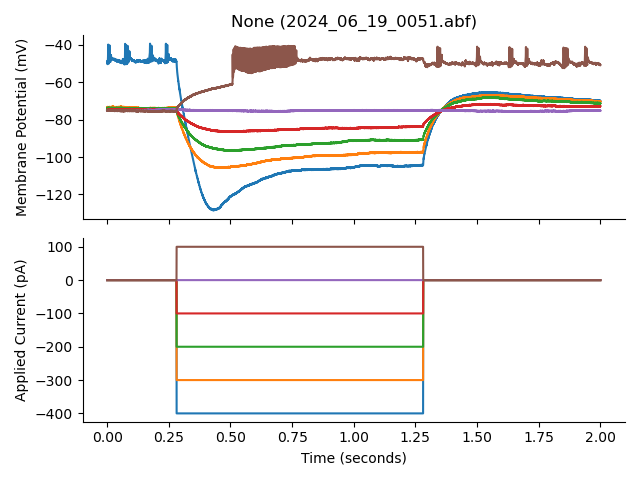

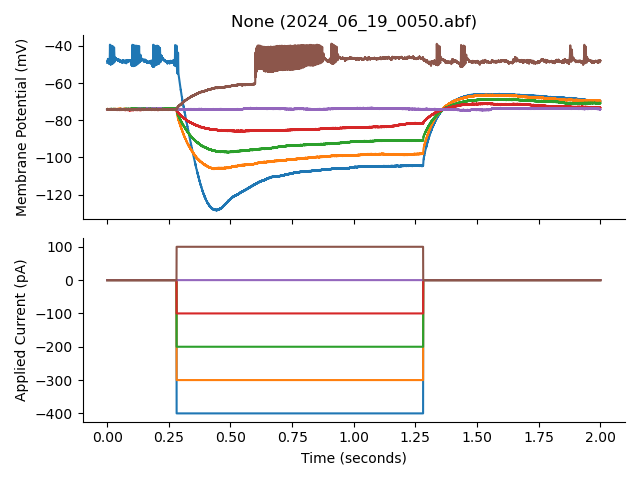

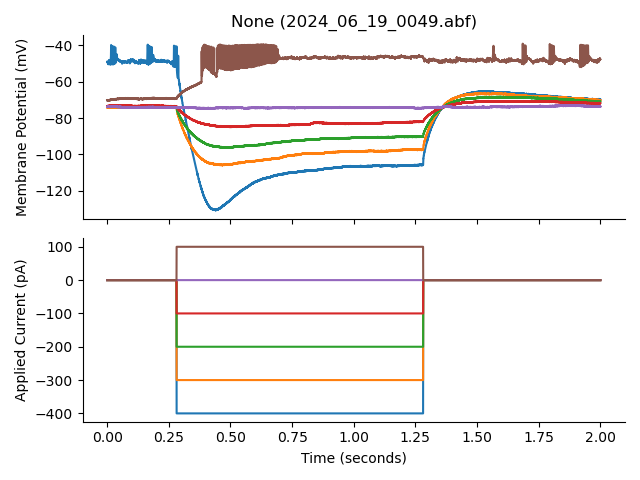

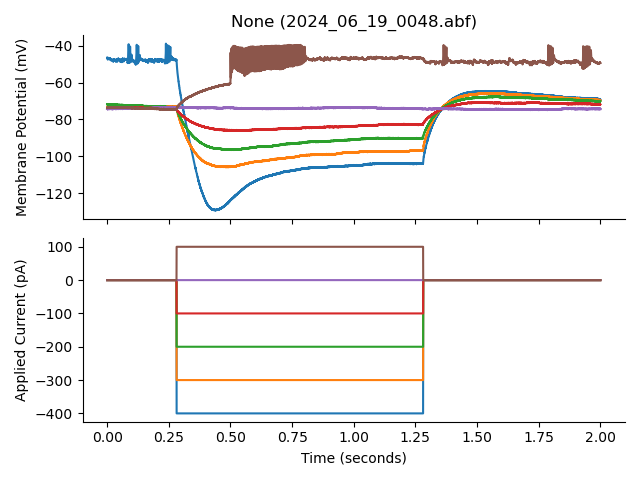

In [7]:
plt.close('all')
iv_files = []
for f in files:
    good = is_IV(f,voltage_step)
    if good != '':
        iv_files.append(f)
        
for f in iv_files:
    plot_swps(f)

In [ ]:
voltage_response

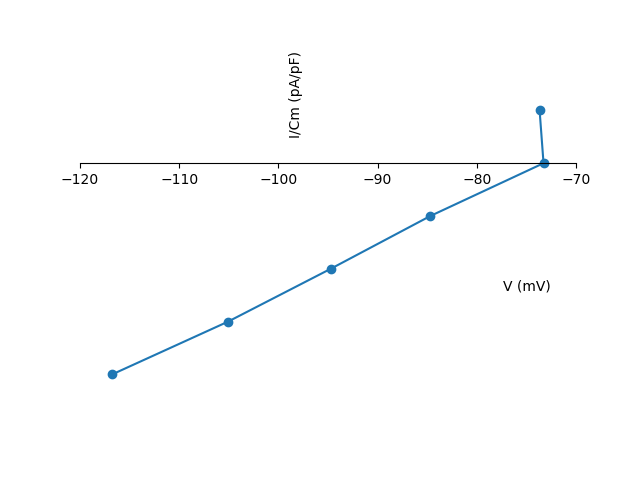

In [8]:
f = iv_files[0]
swps, swp_time, sr = get_sweeps(f)
v_start = 0.5
v_end = 1
current_step = np.mean(swp_window(swps,v_start,v_end,sr,channel=1),axis=1)
## The mean on your voltage step:
i_start = 0
i_end = 0.25
voltage_baseline = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
## the pic response in your current:
i_start = 0.25
i_end = 0.75
voltage_window = swp_window(swps,i_start,i_end,sr,channel=0)
voltage_response = np.array([swp[np.argmax(np.abs(swp))] for swp in voltage_window])
## the pic response in your current:
i_start = 0.25
i_end = 0.75
voltage_window = swp_window(swps,i_start,i_end,sr,channel=0)
voltage_response = np.array([swp[np.argmax(np.abs(swp))] for swp in voltage_window])
## normalise over baseline
# voltage_response -= voltage_baseline
fig,ax = plt.subplots()
ax.plot(voltage_response,current_step,'-o')
# airplane_marker(ax,voltage_step,current_response, airplane_image)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.set_xlabel('V (mV)')
ax.set_ylabel('I/Cm (pA/pF)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_label_coords(0.9, 0.4) 
ax.yaxis.set_label_coords(0.45, 0.9)  # Move the y label to the center left
# Customize ticks to remove the 0 ticks and labels
xticks = [tick for tick in ax.get_xticks() if tick != 0]
yticks = [tick for tick in ax.get_yticks() if tick != 0]
ax.set_xticks(xticks)
ax.set_yticks(yticks)
plt.show()